In [2]:
%pylab inline
#%config InlineBackend.figure_format = 'retina' 

Populating the interactive namespace from numpy and matplotlib


In [11]:
#here are some common modules:
import scipy as sp #library of scientific functions
import scipy.io 
import scipy.signal as signal
import numpy as np #library of math functions
import pandas as pd #library of data analysis functions
import matplotlib.pyplot as plt #functions to plot data
import os #This lets python talk to your opperating system to open and save files.

In [4]:
filename = 'emodat.mat' #adjut file name here
filename = os.path.join('../FM-BCI', filename) #adjust filepath 
datafile = sp.io.loadmat(filename) #loading filename
#print datafile.keys()
voltageSamples = datafile['data'] 
#print voltageSamples.shape, len(voltageSamples)

In [5]:
variances = []
means = []
medians = []
standardDeviations = []
for i in range(len(voltageSamples)):
    variances.append(np.var(voltageSamples[i,:]))
    means.append(np.mean(voltageSamples[i,:]))
    medians.append(np.median(voltageSamples[i,:]))
    standardDeviations.append(np.std(voltageSamples[i,:]))

In [6]:
for i in range(len(voltageSamples)):
    print 'Channel', i+1
    print '\tmean:', means[i]
    print '\tmedian:', medians[i]
    print '\tstandard deviation:', standardDeviations[i]
    print '\tvariance:', np.var(voltageSamples)

Channel 1
	mean: 53.5051604742
	median: 8.42684103561
	standard deviation: 105.317167517
	variance: 11091.7057739


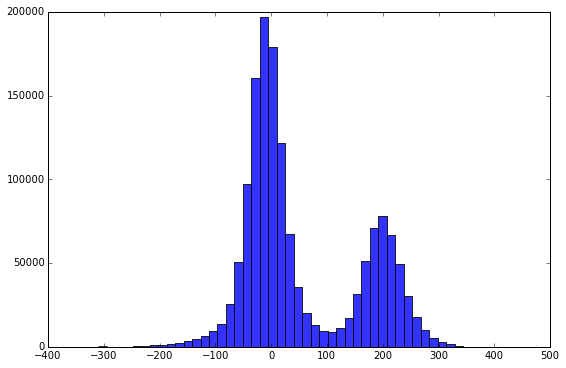

In [7]:
fig1 = plt.figure(1, figsize=(9,6))
numBins = 50
n, bins, patches = plt.hist(voltageSamples[0],numBins,alpha=0.8)


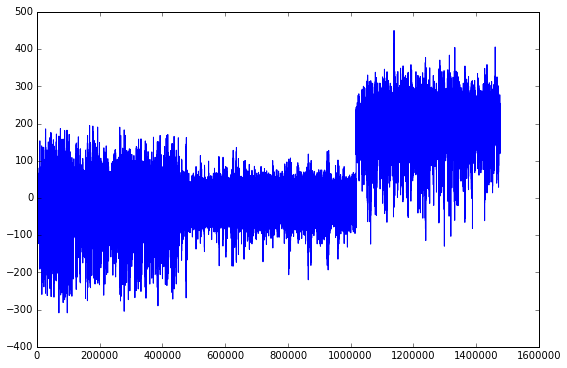

In [8]:
fig2 = plt.figure(2, figsize=(9,6))
plt.plot(voltageSamples[0])

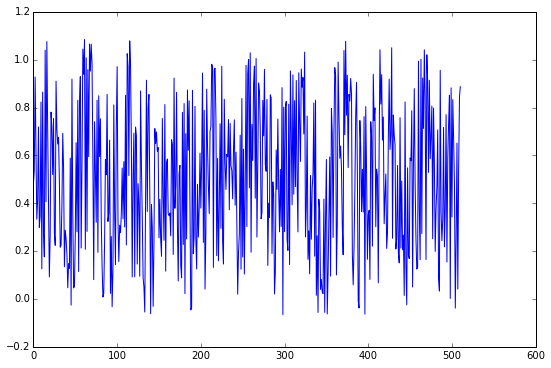

In [9]:
sampleRate = 512
sampleSpacing = 1.0 / sampleRate
dataLengthSecs = 60
dataLengthSamples = dataLengthSecs*sampleRate        # sample size

t = np.arange(0,dataLengthSecs,sampleSpacing)
alpha = 0.1*np.sin(10.0 * 2.0 * np.pi * t)
noise = np.random.random([1,dataLengthSamples])
voltageSamples = alpha+noise
numOfChannel = voltageSamples.shape[0]     # number of channels

desiredFreqResolution = 0.01
paddingMultiple = 1/desiredFreqResolution
fftLengthSamples = dataLengthSamples*int(paddingMultiple)
nyq = 0.5*sampleRate
fig3 = plt.figure(3, figsize=(9,6))
plt.plot(voltageSamples[0,1:sampleRate]) # plots 1 second of data

In [13]:
for channelIndex in range(0,numOfChannel):
    # detrend and window channel
    channelVoltage = voltageSamples[channelIndex,:] - np.mean(voltageSamples[channelIndex,:])
    #windowed = channelVoltage * signal.blackmanharris(dataLengthSamples)
    windowed = channelVoltage * signal.gaussian(dataLengthSamples, std=8,sym=False)

    # compute fft
    amp = abs(scipy.fftpack.rfft(channelVoltage,fftLengthSamples))
    freqs = scipy.fftpack.rfftfreq(fftLengthSamples,sampleSpacing)

    # find peak frequency
    maxAmplitudeIndex = np.argmax(amp)
    true_maxAmplitudeIndex = parabolic(np.log(amp), maxAmplitudeIndex)[0]
    maxFreq = sampleRate * maxAmplitudeIndex / fftLengthSamples
    true_maxFreq = sampleRate * true_maxAmplitudeIndex / fftLengthSamples
    print('Channel '+str(channelIndex+1)+':     '+str(true_maxFreq)+'  '+str(maxFreq))


NameError: name 'parabolic' is not defined